In [77]:
import matplotlib.pyplot as pt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [78]:
data = pd.read_csv("/home/nitesh/Desktop/DecisionTreeClassifier/digit_recognizer/dataset/train.csv").as_matrix()
print(data[0])

[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250
 253  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247
 253 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  29 207 253 235  77   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


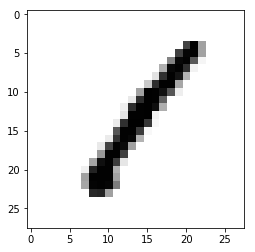

In [79]:
#training_data

x_train = data[0:22000, 1:]/255
train_lable = data[0:22000, 0]

#test_data
x_test = data[22000:, 1:]/255
test_lable = data[22000:, 0]

tmp = x_train[0]
tmp.shape=(28,28)
pt.imshow(255-tmp,cmap="gray")
pt.show()

In [80]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(x_train, train_lable, batch_size=32, epochs=10, validation_split=0.1)

Train on 19800 samples, validate on 2200 samples
Epoch 1/10
19800/19800 [==============================] - 5s 263us/sample - loss: 0.7481 - acc: 0.8136 - val_loss: 0.3610 - val_acc: 0.8968
Epoch 2/10
19800/19800 [==============================] - 4s 205us/sample - loss: 0.2743 - acc: 0.9211 - val_loss: 0.2648 - val_acc: 0.9214
Epoch 3/10
19800/19800 [==============================] - 4s 206us/sample - loss: 0.2088 - acc: 0.9379 - val_loss: 0.2235 - val_acc: 0.9323
Epoch 4/10
19800/19800 [==============================] - 4s 205us/sample - loss: 0.1689 - acc: 0.9505 - val_loss: 0.2067 - val_acc: 0.9323
Epoch 5/10
19800/19800 [==============================] - 4s 209us/sample - loss: 0.1375 - acc: 0.9598 - val_loss: 0.1779 - val_acc: 0.9405
Epoch 6/10
19800/19800 [==============================] - 4s 208us/sample - loss: 0.1141 - acc: 0.9674 - val_loss: 0.1676 - val_acc: 0.9459
Epoch 7/10
19800/19800 [==============================] - 4s 205us/sample - loss: 0.0946 - acc: 0.9735 - val_lo

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         multiple                  0         
_________________________________________________________________
dense_66 (Dense)             multiple                  100480    
_________________________________________________________________
activation_30 (Activation)   multiple                  0         
_________________________________________________________________
dense_67 (Dense)             multiple                  16512     
_________________________________________________________________
activation_31 (Activation)   multiple                  0         
_________________________________________________________________
dense_68 (Dense)             multiple                  1290      
_________________________________________________________________
activation_32 (Activation)   multiple                  0         
Total para

In [82]:
val_loss, val_accuracy = model.evaluate(x_test, test_lable)

20000/20000 [==============================] - 2s 85us/sample - loss: 0.1339 - acc: 0.9603
